## In this project we will be using K Means Clustering not to predict an outcome or classify but to simply Cluster the data based on similar Caracteristics. We will be using SKLearn to generate dummy data for thus project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DAta generaton

In [2]:
from sklearn.datasets import make_blobs

## Data created below will have 4 blobs(cluster) that willl have 200 rows and 2 columns. So 4 different blobs of data with the same number of rows and columns. we will plot to see this in action below

In [3]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [31]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [28]:
df = pd.DataFrame(data[0])

## For testing purposes only we will put the data in a data frame. Values forn the "Data" at index [1] is representing the cluster class fro mthe blobs data. Even though normally we will not have this data. We weill use kmeans to do the work for us

In [34]:
df["cluster class"] = data[1]

In [35]:
df.head()

,0,1,cluster class
0,-6.428841,10.141117,3
1,5.868679,5.201104,2
2,-0.376109,3.264279,0
3,2.166792,9.563005,2
4,5.095086,7.207527,2


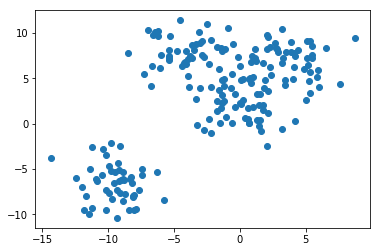

In [30]:
plt.scatter(df[0], df[1])

In [7]:
data[0].shape

(200, 2)

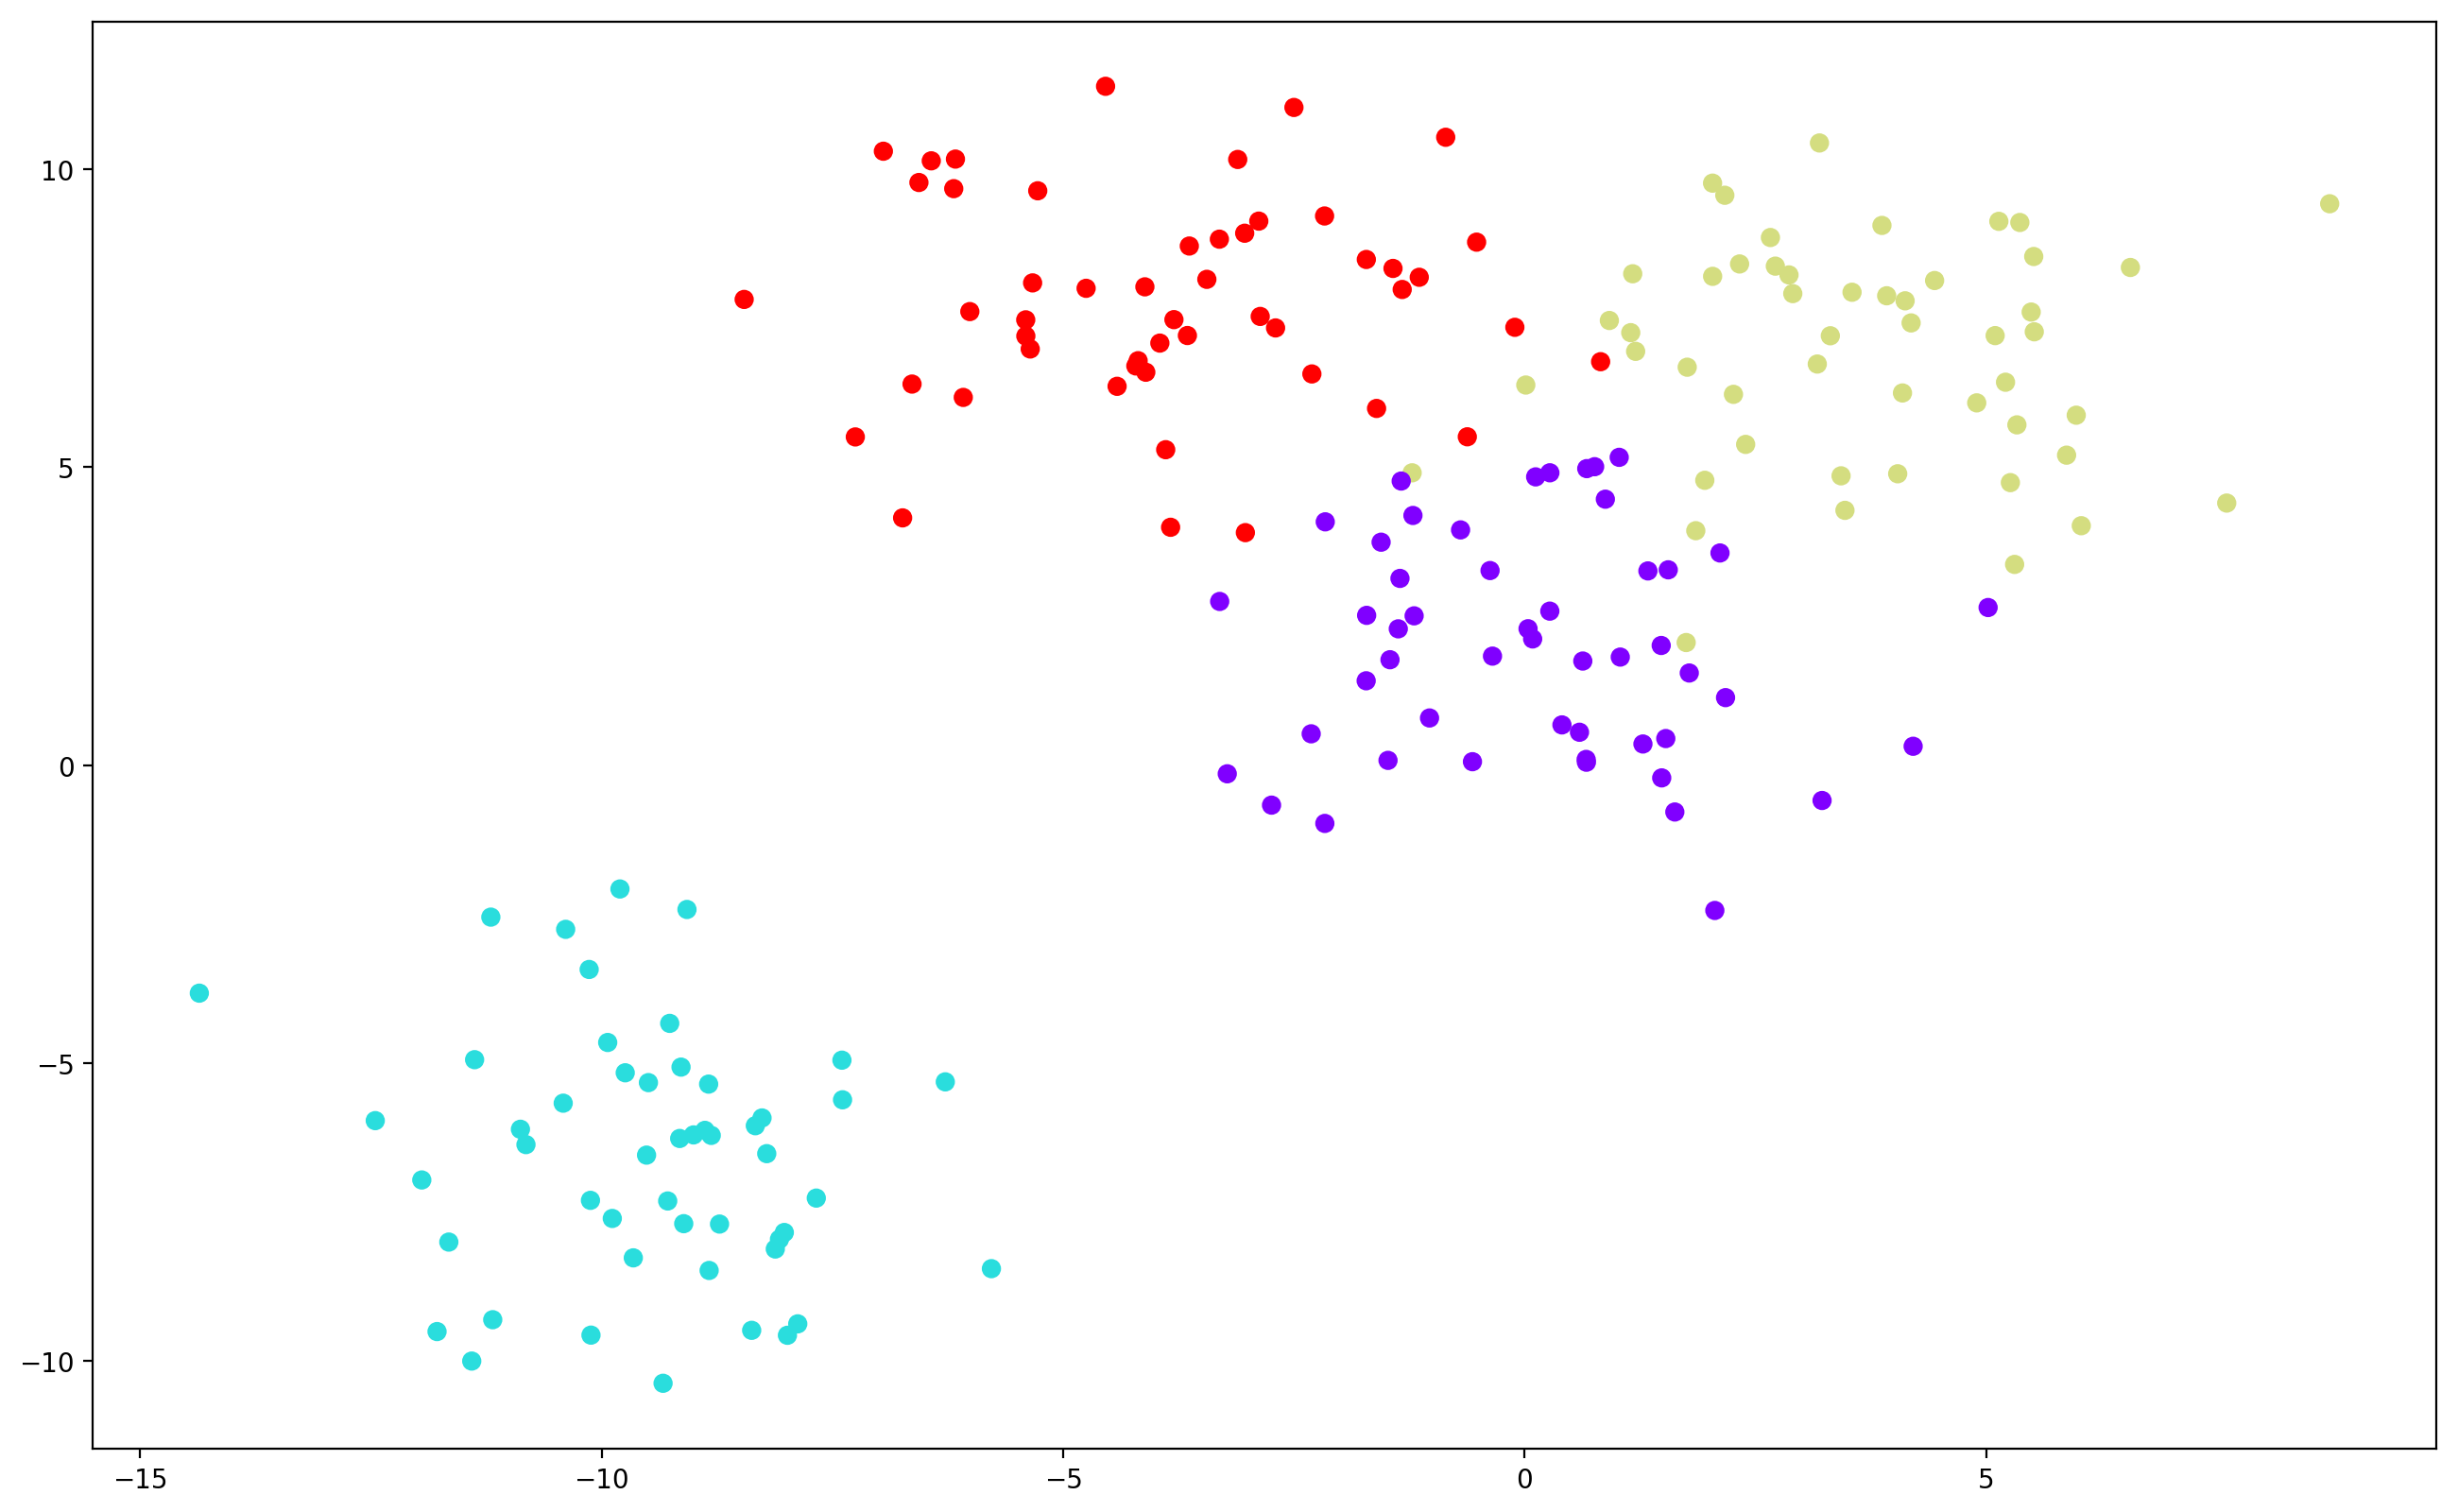

In [14]:
plt.figure(figsize=(16,10), dpi = 200)
plt.scatter(data[0][:,0], data[0][:,1], c = data[1], s = 40, cmap="rainbow")

## lets use Kmean to create clusters

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans =KMeans(n_clusters=4)

In [17]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

#### Below is what K means believe or labels should be so lets plot this against the original llabels and see how it compairs

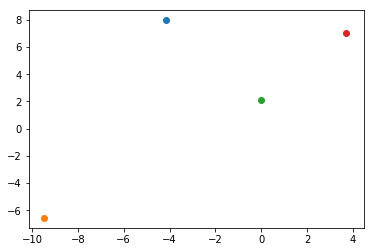

In [37]:
for n in kmeans.cluster_centers_:
    plt.scatter(n[0],n[1])

In [19]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2], dtype=int32)

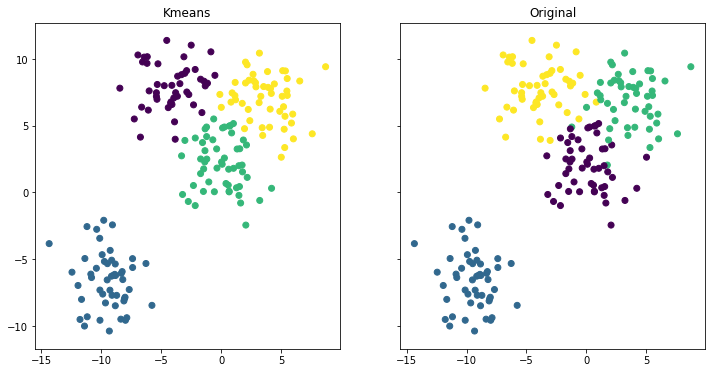

In [24]:
fig, (axe1,axe2) = plt.subplots(1,2, sharey=True, figsize = (12,6))

axe1.set_title("Kmeans")
axe1.scatter(data[0][:,0], data[0][:,1], c = kmeans.labels_, cmap = "viridis")
axe2.set_title("Original")
axe2.scatter(data[0][:,0], data[0][:,1], c = data[1], cmap = "viridis")